<a href="https://colab.research.google.com/github/Dhirajkumarpal/Algo/blob/master/Pan_Fraud_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests


In [6]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/images

In [7]:
Original=Image.open(requests.get('https://images.hindustantimes.com/tech/img/2021/12/04/960x540/CVYXbZCUkAEzfBS_1638602123341_1638602188845.png',stream=True).raw)
Userinputimage=Image.open(requests.get('https://images.livemint.com/img/2019/10/25/1600x900/pan_card_1565610340828_1572021543426.PNG',stream=True).raw)
print(Original)
print(Original.size,Original.format)
print(Userinputimage.size,Userinputimage.format)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x540 at 0x7F5327C65D90>
(960, 540) JPEG
(1597, 900) JPEG


In [8]:






Original=Original.resize((250,160))
Original.save(('pan_card_tampering/images/original.png'))

In [9]:
Userinputimage=Userinputimage.resize((250,160))
Userinputimage.save(('pan_card_tampering/images/Userinputimage.png'))

In [10]:
Original=Image.open('pan_card_tampering/images/original.png')
Userinputimage=Image.open('pan_card_tampering/images/Userinputimage.png')


In [11]:
print(Original.size)

(250, 160)


In [12]:
print(Original)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=250x160 at 0x7F53271BEA10>


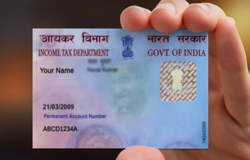

In [13]:
Original

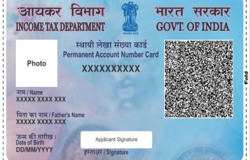

In [14]:

Userinputimage

In [15]:
Original=cv2.imread('pan_card_tampering/images/original.png')
Userinputimage=cv2.imread('pan_card_tampering/images/Userinputimage.png')
print(Userinputimage)

[[[255 255 255]
  [255 255 255]
  [217 217 217]
  ...
  [255 255 255]
  [255 255 255]
  [249 249 249]]

 [[255 255 255]
  [255 255 255]
  [249 249 249]
  ...
  [255 255 255]
  [255 255 255]
  [239 239 239]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [235 234 234]]

 ...

 [[253 253 253]
  [255 255 255]
  [252 252 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [220 220 220]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [208 208 208]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]]


In [16]:
Original

array([[[ 50,  46,  52],
        [ 50,  46,  52],
        [ 50,  46,  52],
        ...,
        [ 87, 143, 172],
        [ 87, 143, 172],
        [ 87, 143, 172]],

       [[ 50,  46,  52],
        [ 50,  46,  52],
        [ 50,  46,  52],
        ...,
        [ 89, 145, 174],
        [ 89, 145, 174],
        [ 89, 145, 174]],

       [[ 49,  45,  51],
        [ 49,  45,  51],
        [ 49,  45,  51],
        ...,
        [ 91, 147, 176],
        [ 91, 147, 176],
        [ 91, 147, 176]],

       ...,

       [[ 23,  20,  22],
        [ 23,  20,  22],
        [ 23,  20,  22],
        ...,
        [ 54,  77, 139],
        [ 60,  83, 145],
        [ 65,  88, 150]],

       [[ 23,  20,  22],
        [ 23,  20,  22],
        [ 23,  20,  22],
        ...,
        [ 49,  72, 134],
        [ 53,  76, 138],
        [ 58,  81, 143]],

       [[ 24,  21,  23],
        [ 24,  21,  23],
        [ 24,  21,  23],
        ...,
        [ 40,  63, 125],
        [ 45,  68, 130],
        [ 52,  75, 137]]

In [17]:
Original_gray=cv2.cvtColor(Original,cv2.COLOR_BGR2GRAY)
Userinputimage_gray=cv2.cvtColor(Userinputimage,cv2.COLOR_BGR2GRAY)
print(len(Original_gray))

160


In [18]:
(score,diff)=structural_similarity(Original_gray,Userinputimage_gray,full=True)
print(diff)
diff=(diff*255).astype("uint8")
print(score)

[[0.0508894  0.05740015 0.05838916 ... 0.06878598 0.076776   0.07028648]
 [0.0371841  0.04031533 0.04114896 ... 0.06870587 0.07642145 0.06830944]
 [0.02738782 0.02940614 0.03032952 ... 0.04469311 0.05070015 0.04726451]
 ...
 [0.01346324 0.01509648 0.01522104 ... 0.04801591 0.09535031 0.0701768 ]
 [0.01501188 0.01689864 0.01704571 ... 0.11129023 0.15712691 0.12737999]
 [0.01491315 0.01719966 0.01734018 ... 0.23619514 0.28483074 0.2452703 ]]
0.2142889320841495


In [19]:


thresh=cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
print(thresh)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [20]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(cnts)

cnts = imutils.grab_contours(cnts)
print(cnts)

[array([[[213, 159]]], dtype=int32), array([[[244,  60]],

       [[244,  62]],

       [[243,  63]],

       [[243,  65]],

       [[244,  66]],

       [[244,  67]],

       [[242,  69]],

       [[242,  72]],

       [[244,  70]]], dtype=int32), array([[[241,  41]],

       [[241,  45]],

       [[242,  46]],

       [[242,  47]],

       [[242,  46]],

       [[243,  45]],

       [[244,  45]],

       [[242,  43]],

       [[242,  41]]], dtype=int32), array([[[169,  19]],

       [[176,  19]]], dtype=int32), array([[[161,  12]]], dtype=int32), array([[[184,  11]],

       [[184,  16]]], dtype=int32), array([[[171,   9]]], dtype=int32), array([[[175,   8]],

       [[174,   9]],

       [[173,   9]],

       [[173,  14]],

       [[175,  16]],

       [[177,  16]],

       [[178,  15]],

       [[178,  14]],

       [[179,  13]],

       [[179,   8]],

       [[178,   9]],

       [[177,   8]]], dtype=int32), array([[[161,   5]],

       [[158,   8]],

       [[158,   9]],

       

In [21]:
for c in cnts:
        # applying contours on image",
        (x, y, w, h) = cv2.boundingRect(c)
        print(x, y, w, h)
        cv2.rectangle(Original, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(Userinputimage, (x, y), (x + w, y + h), (0, 0, 255), 2)


213 159 1 1
242 60 3 13
241 41 4 7
169 19 8 1
161 12 1 1
184 11 1 6
171 9 1 1
173 8 7 9
158 5 12 9
159 0 18 4
0 0 250 160


Original Format Image


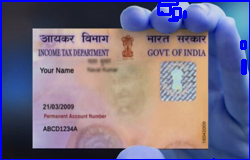

In [22]:
print('Original Format Image')
Image.fromarray(Original)
 

Tampered Image


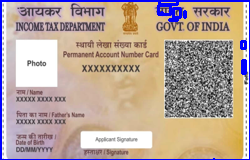

In [23]:
print('Tampered Image')
Image.fromarray(Userinputimage)


Different Image


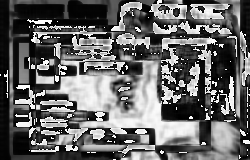

In [24]:
print('Different Image')
Image.fromarray(diff)

Threshold Image
40000


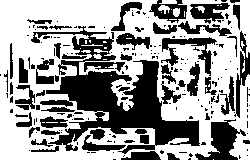

In [25]:
print('Threshold Image')
print(thresh.size)
Image.fromarray(thresh)

In [26]:
print(250*180)

45000


Different Image


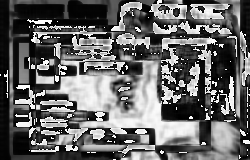

In [27]:
print('Different Image')
Image.fromarray(diff)